In [2]:
import pandas as pd

In [3]:
quality = pd.read_csv("quality_of_life_indices_by_country.csv")

In [4]:
quality

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1490,79,Peru,84.6,34.8,32.7,56.3,30.0,18.3,48.9,82.5,97.7,2024/2
1491,80,Iran,80.4,26.0,49.7,52.5,26.4,23.4,46.4,75.3,71.0,2024/2
1492,81,Sri Lanka,75.2,17.5,57.9,71.0,34.6,39.1,54.6,58.5,59.1,2024/2
1493,82,Bangladesh,72.6,33.1,38.4,42.2,22.5,12.3,57.6,85.6,71.3,2024/2


In [5]:
quality = quality[["Country", "Quality of Life Index", "Purchasing Power Index", "Safety Index", "Health Care Index", "Cost of Living Index", "Property Price to Income Ratio"]]

In [25]:
quality.loc[:, "Row"] = quality.reset_index().index + 1
quality

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Row
0,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,1
1,Germany,195.9,111.8,71.5,75.6,76.3,6.6,2
2,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,3
3,United States,192.5,126.1,50.0,67.8,76.5,2.6,4
4,Finland,190.2,101.2,70.5,69.4,89.7,7.0,5
...,...,...,...,...,...,...,...,...
1490,Peru,84.6,34.8,32.7,56.3,30.0,18.3,1491
1491,Iran,80.4,26.0,49.7,52.5,26.4,23.4,1492
1492,Sri Lanka,75.2,17.5,57.9,71.0,34.6,39.1,1493
1493,Bangladesh,72.6,33.1,38.4,42.2,22.5,12.3,1494


In [26]:
quality.corr(numeric_only=True)["Quality of Life Index"]

Quality of Life Index             1.000000
Purchasing Power Index            0.779720
Safety Index                      0.532045
Health Care Index                 0.552464
Cost of Living Index              0.607517
Property Price to Income Ratio   -0.497310
Row                               0.010723
Name: Quality of Life Index, dtype: float64

In [27]:
import seaborn as sns

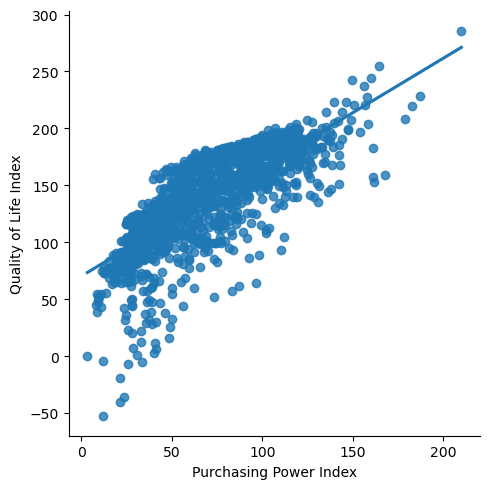

In [28]:
sns.lmplot(x="Purchasing Power Index", y="Quality of Life Index", data=quality, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

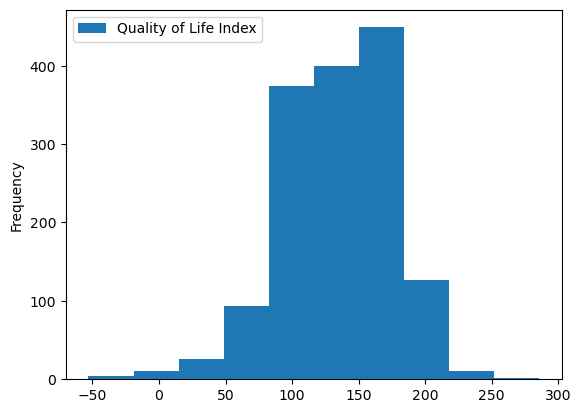

In [29]:
quality.plot.hist(y="Quality of Life Index")

In [30]:
train = quality[quality["Row"] <= 1196].copy()
test = quality[quality["Row"] > 1196].copy()

In [31]:
train.shape

(1196, 8)

In [32]:
test.shape

(299, 8)

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [34]:
predictors = ["Purchasing Power Index", "Safety Index", "Health Care Index", "Cost of Living Index", "Property Price to Income Ratio"]
target = ["Quality of Life Index"]

In [35]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [36]:
predictions = reg.predict(test[predictors])

In [37]:
test["predictions"] = predictions
test["predictions"] = test["predictions"].round(2)
test.sort_values(by=["Quality of Life Index"])

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Row,predictions
1242,Nigeria,38.5,8.4,34.5,48.5,30.9,28.2,1243,49.10
1494,Nigeria,42.7,11.0,33.3,48.2,31.4,23.9,1495,54.62
1411,Nigeria,47.1,9.4,33.8,48.7,19.3,21.1,1412,56.37
1326,Nigeria,49.5,9.4,34.2,48.0,23.2,18.2,1327,60.05
1410,Bangladesh,69.1,25.8,38.5,42.3,24.9,12.7,1411,75.46
...,...,...,...,...,...,...,...,...,...
1415,Oman,204.3,139.8,81.8,65.1,42.4,2.9,1416,201.00
1414,Denmark,205.6,127.2,73.9,78.5,72.3,6.6,1415,195.84
1327,Luxembourg,207.3,148.9,65.6,76.3,65.3,9.1,1328,196.93
1413,Netherlands,207.5,124.9,73.6,79.3,63.1,7.7,1414,192.52


In [38]:
test

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Row,predictions
1196,Poland,139.9,64.0,70.8,57.6,38.6,13.3,1197,131.99
1197,South Africa,138.8,83.9,24.6,63.7,37.8,3.4,1198,124.98
1198,Hungary,134.3,53.1,66.1,54.4,39.2,14.6,1199,118.72
1199,South Korea,133.0,85.5,74.5,83.0,70.4,26.0,1200,152.40
1200,Romania,132.9,52.5,68.0,56.5,37.4,10.9,1201,125.33
...,...,...,...,...,...,...,...,...,...
1490,Peru,84.6,34.8,32.7,56.3,30.0,18.3,1491,79.58
1491,Iran,80.4,26.0,49.7,52.5,26.4,23.4,1492,78.14
1492,Sri Lanka,75.2,17.5,57.9,71.0,34.6,39.1,1493,74.01
1493,Bangladesh,72.6,33.1,38.4,42.2,22.5,12.3,1494,79.69


In [39]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["Quality of Life Index"], test["predictions"])

In [40]:
error

11.970033444816053

In [41]:
quality.describe()["Quality of Life Index"]

count    1495.000000
mean      134.156656
std        40.828402
min       -53.000000
25%       105.350000
50%       136.200000
75%       165.700000
max       285.800000
Name: Quality of Life Index, dtype: float64

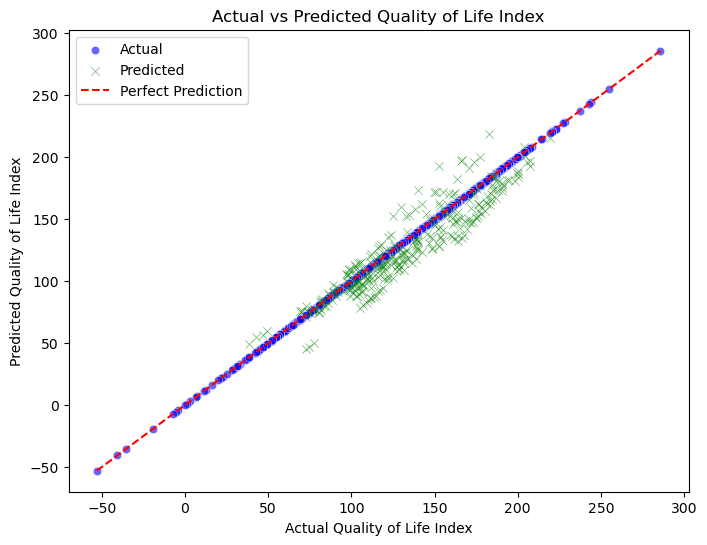

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot actual values (blue) and predicted values (orange)
sns.scatterplot(x=quality["Quality of Life Index"], y=quality["Quality of Life Index"], 
                label="Actual", color='blue', marker='o', alpha=0.6)

sns.scatterplot(x=quality["Quality of Life Index"], y=test["predictions"], 
                label="Predicted", color='green', marker='x', alpha=0.6)

# Add diagonal line (perfect prediction line)
plt.plot([quality["Quality of Life Index"].min(), quality["Quality of Life Index"].max()], 
         [quality["Quality of Life Index"].min(), quality["Quality of Life Index"].max()], 
         color='red', linestyle='dashed', label="Perfect Prediction")

plt.xlabel("Actual Quality of Life Index")
plt.ylabel("Predicted Quality of Life Index")
plt.title("Actual vs Predicted Quality of Life Index")
plt.legend()  # Show legend for clarity
plt.show()
